In [23]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_excel(r'C:\Users\ritee\Desktop\Classes\ExcelR\Assignments\Assignment - 13\Decision Tree\refer\heart_disease.xlsx', sheet_name = 'Heart_disease')

In [27]:
9df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [29]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [31]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


In [35]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [40]:
data = df.copy()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Apply one-hot encoding to categorical columns (automatically handles all categorical variables)
data_encoded = pd.get_dummies(data)

# Check the encoded data (optional)
print(data_encoded.head())

imputer = SimpleImputer(strategy='mean')
X = data_encoded.drop('num', axis=1)  # Replace with the actual target column
X_imputed = imputer.fit_transform(X)


y = data_encoded['num']  # Replace with the actual target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Female  sex_Male  \
0   63       145   233   True     150      2.3    0           0         1   
1   41       135   203  False     132      0.0    0           0         1   
2   57       140   192  False     148      0.4    0           0         1   
3   52       118   186  False     190      0.0    0           0         1   
4   57       110   201  False     126      1.5    0           0         1   

   cp_asymptomatic  ...  exang_False  exang_True  exang_FALSE  exang_TURE  \
0                0  ...            1           0            0           0   
1                0  ...            1           0            0           0   
2                1  ...            1           0            0           0   
3                0  ...            1           0            0           0   
4                1  ...            0           1            0           0   

   slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0 

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best parameters:", grid_search.best_params_)
y_pred_optimized = grid_search.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 20}
Optimized Accuracy: 0.5604395604395604


In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Evaluate the model
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Accuracy: 51.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        89
           1       0.40      0.40      0.40        48
           2       0.33      0.36      0.35        22
           3       0.17      0.18      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.52      0.51      0.51       182

Confusion Matrix:
[[63 15  6  4  1]
 [16 19  6  5  2]
 [ 3  7  8  3  1]
 [ 3  7  2  3  2]
 [ 1  0  2  3  0]]
Feature Importance:
age: 0.1356
trestbps: 0.1123
chol: 0.1444
fbs: 0.0271
thalch: 0.1373
oldpeak: 0.1024
sex_Female: 0.0020
sex_Male: 0.0090
cp_asymptomatic: 0.1145
cp_atypical angina: 0.0080
cp_non-anginal: 0.0036
cp_typical angina: 0.0075
restecg_lv hypertrophy: 0.0074
restecg_normal: 0.0335
restecg_st-t abnormality: 0.0092
exang_False: 0.0269
exang_True: 0.

Unique class labels in y_train: [0 1 3 2 4]


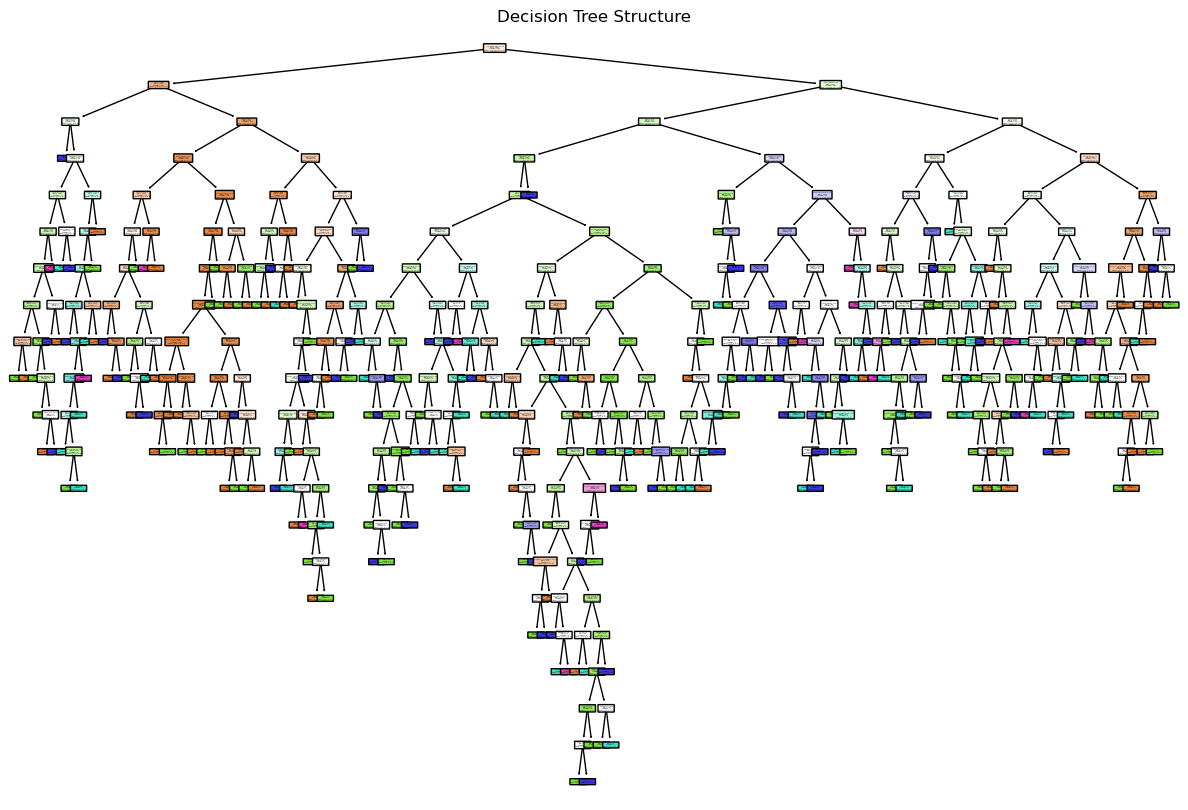

In [53]:
# Check the unique class labels in the target variable
print("Unique class labels in y_train:", y_train.unique())

# Use the actual class names based on the unique labels
plt.figure(figsize=(15, 10))

# Update class_names based on the unique labels in the data
# Use y_train.unique() to create the class_names list dynamically
class_labels = [str(int(label)) for label in y_train.unique()]  # Convert to string if needed

plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_labels, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


C:\Users\ritee\AppData\Local\Temp\ipykernel_5832\1053213610.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


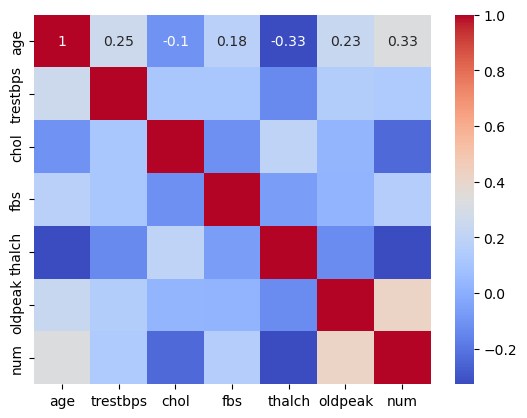

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

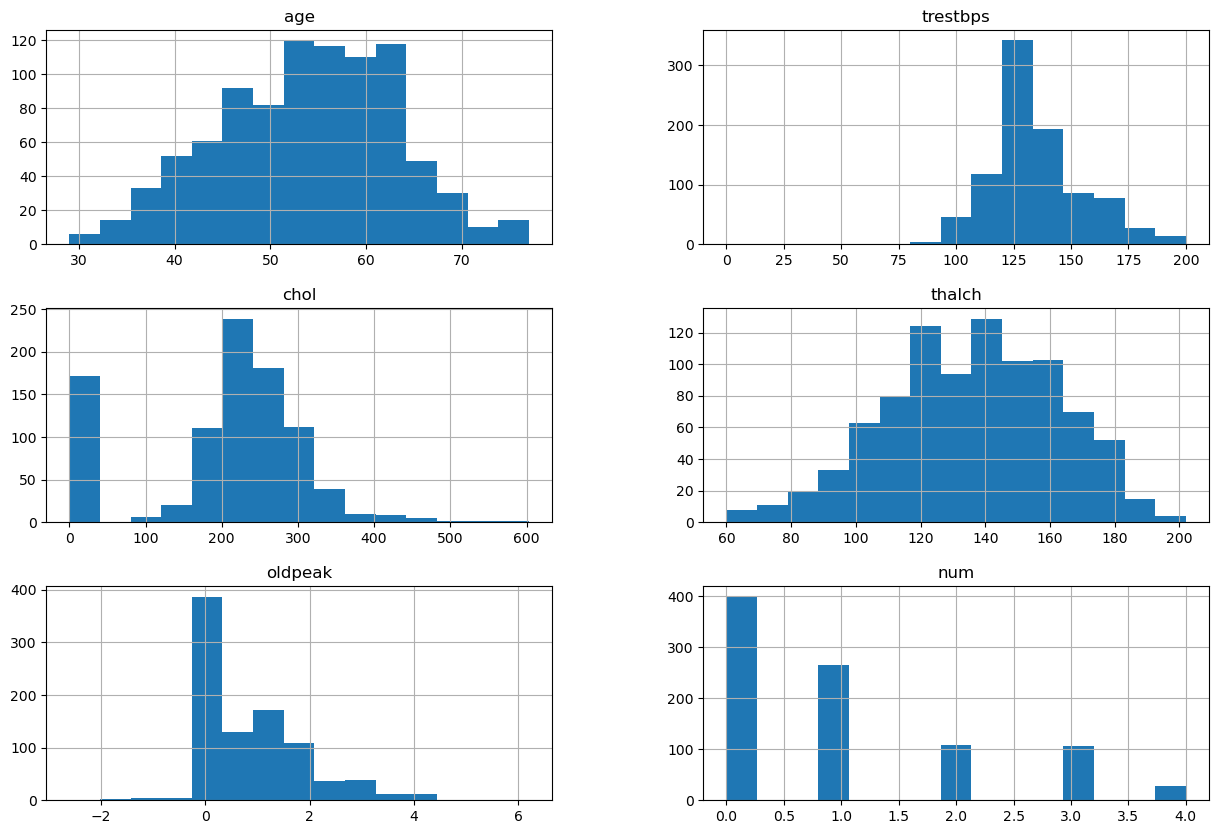

In [62]:
data.hist(bins=15, figsize=(15,10))
plt.show()

E:\Anaconda\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
E:\Anaconda\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Figure size 1000x1000 with 0 Axes>

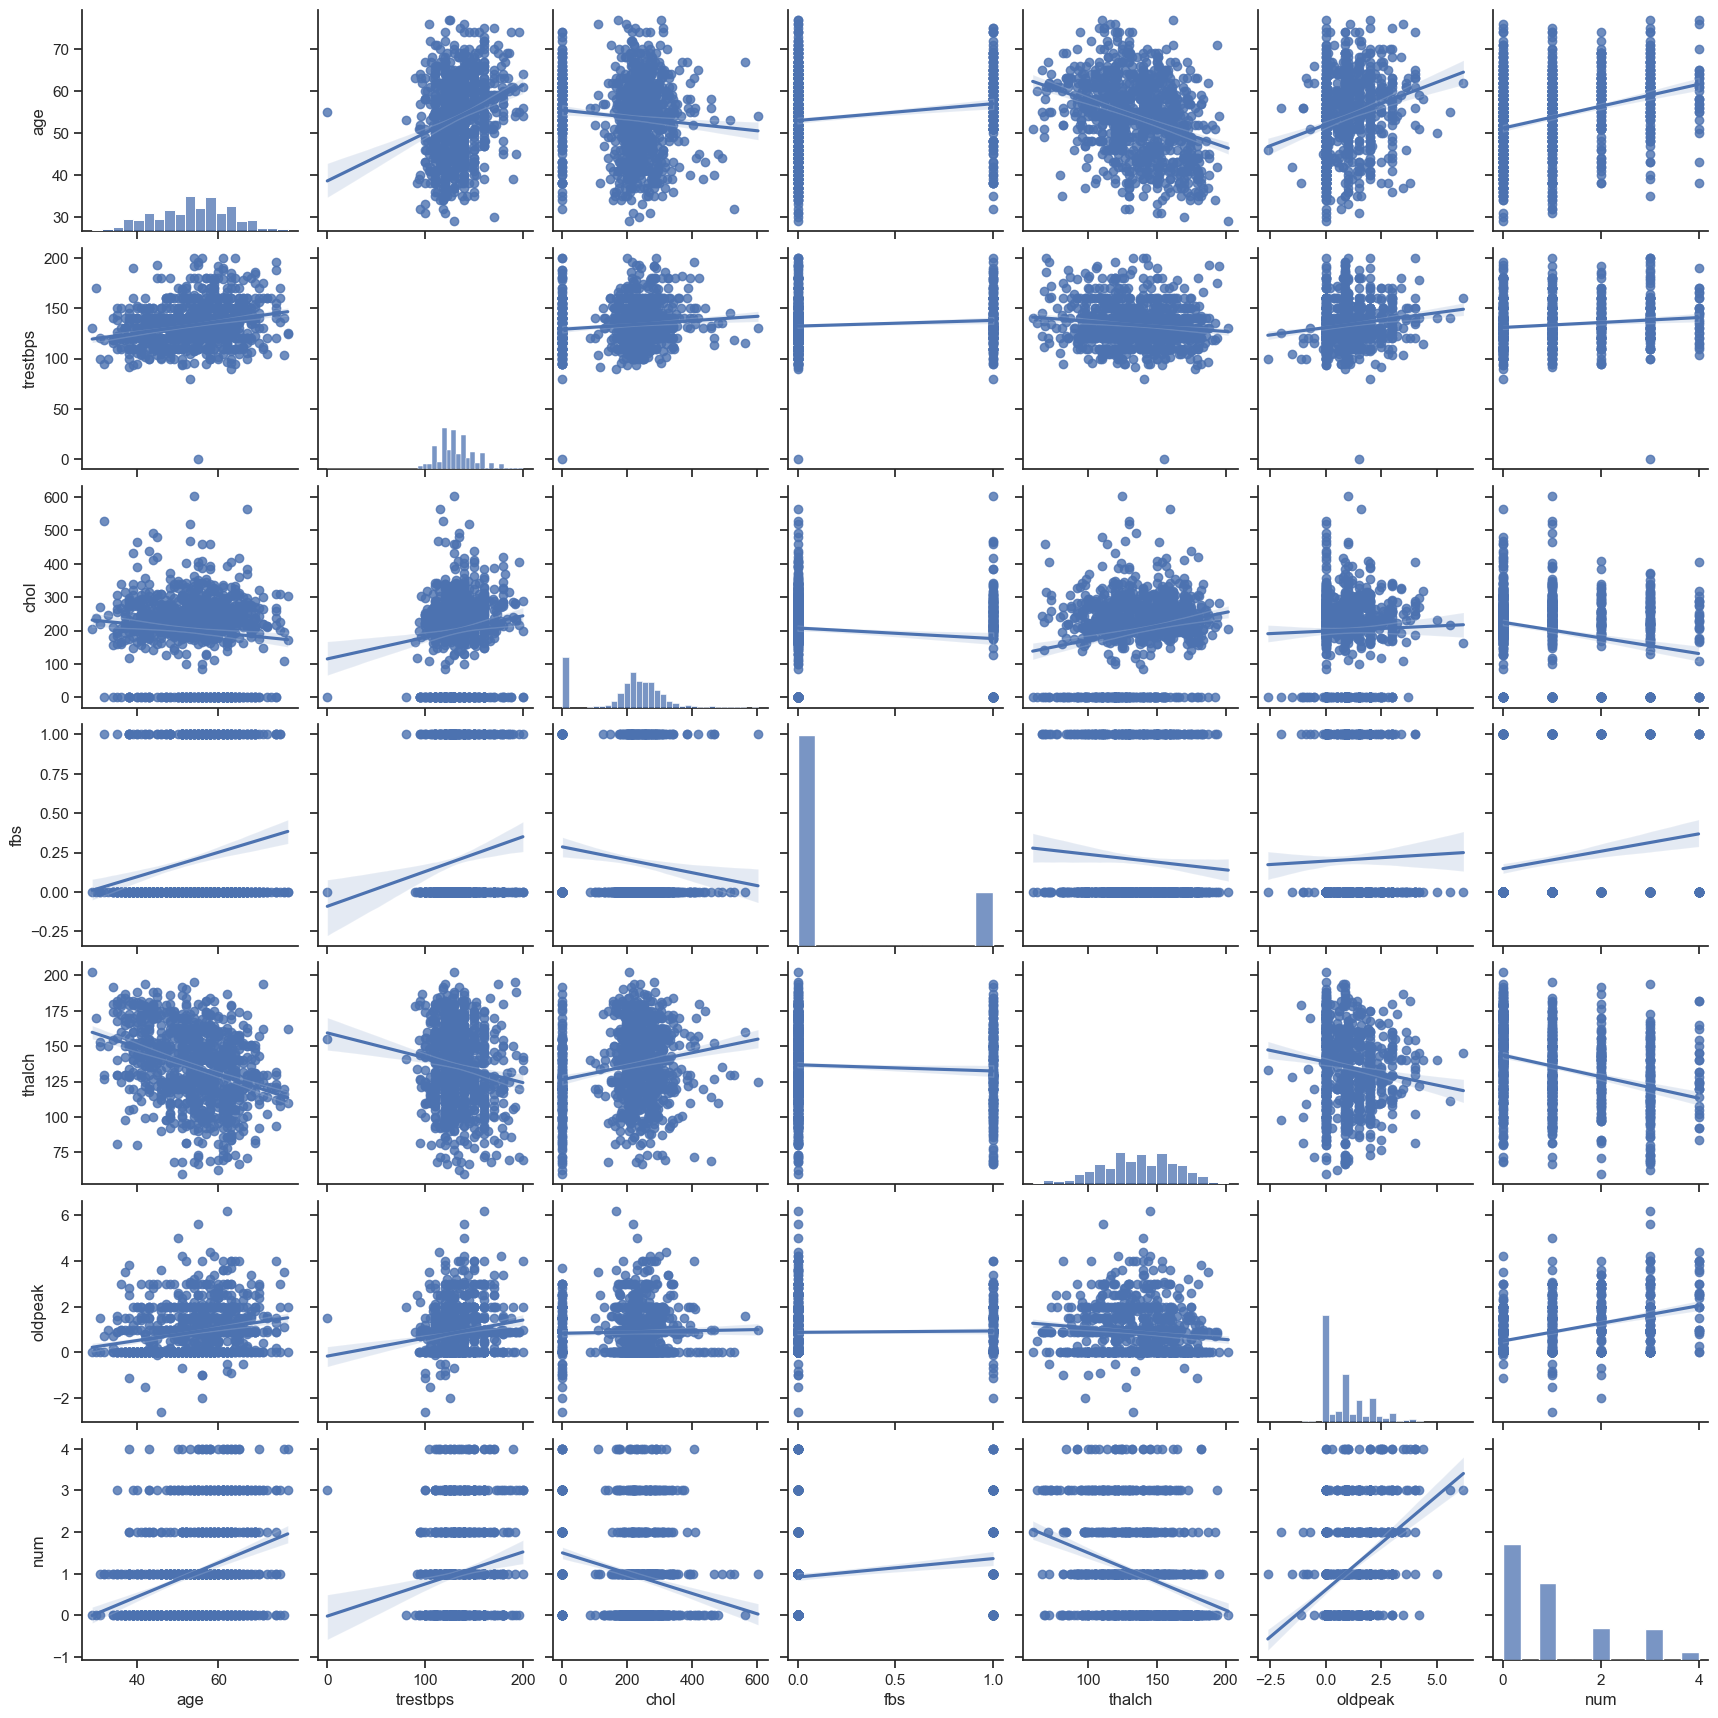

In [65]:
plt.figure(figsize=(10, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, kind="reg")
plt.show()


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
ans
1.max_depth
Definition: Limits the maximum depth of the tree.
Effect:
Shallow trees: If max_depth is set too low, the model might underfit, capturing too few patterns in the data.
Deep trees: If max_depth is too high, the model could overfit, capturing noise and specifics of the training data.
Example: Setting max_depth=5 restricts the tree to a maximum of 5 levels, controlling the tree's complexity.
2. min_samples_split
Definition: The minimum number of samples required to split an internal node.
Effect:
Higher values result in fewer splits, which can reduce overfitting and lead to simpler trees.
Lower values allow more splits, increasing the tree's complexity but possibly leading to overfitting.
Example: Setting min_samples_split=10 ensures that a node must have at least 10 samples before it can be split further.
3. min_samples_leaf
Definition: The minimum number of samples required to be at a leaf node.
Effect:
If set too high, the tree will be more constrained, preventing overfitting but possibly underfitting.
Lower values allow more flexibility but can make the model more prone to overfitting.
Example: min_samples_leaf=5 ensures that each leaf has at least 5 samples, smoothing the model’s predictions.
4. max_features
Definition: The maximum number of features considered when looking for the best split.
Effect:
Lower values: Reducing the number of features used in splits can make the model less prone to overfitting by introducing randomness.
Higher values: Using more features increases the complexity of the model but also its risk of overfitting.
Example: max_features='sqrt' (square root of the total number of features) is a common setting in random forests.
5. criterion
Definition: The function used to measure the quality of a split.
Options:
Gini index (gini): Measures impurity by calculating how often a randomly chosen element would be incorrectly classified.
Entropy (entropy): Measures information gain, which is more computationally expensive but can be more informative for some datasets.
Effect:
Gini is faster to compute and generally leads to similar results as entropy.
Entropy might lead to different splits but may be more suitable for certain tasks where information gain is critical.

2. What is the difference between the Label encoding and One-hot encoding?
ans
Label Encoding converts categories into integers, which can mislead the model into thinking there is an order.
One-Hot Encoding creates binary columns for each category, which avoids the issue of implied order but increases the dataset's dimensionality.